# 1. Solo Traveler Data

In [1]:
import json  
import pandas as pd  
import time

In [2]:
 

with open('matching.json') as f: 
    df = pd.DataFrame(json.load(f))

In [3]:
df2 = df.copy()
len(df2),len(df)

(1767244, 1767244)

In [4]:
df1=pd.DataFrame(df.head())
df1

,Building,Level,ClientMacAddr,lat,lng,localtime
0,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
1,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
2,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC
3,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC
4,TPS2,Level 3,28:83:35:26:bc:f3,-22.813551,-43.247198,2019-11-19 00:00:00.272 UTC


In [5]:

df =df.drop_duplicates(subset=None, keep='first', inplace=False)
len(df)

1034663

In [6]:
df['localtime'] = pd.to_datetime(df['localtime'], utc=True)


In [7]:
df1.dtypes

Building          object
Level             object
ClientMacAddr     object
lat              float64
lng              float64
localtime         object
dtype: object

In [8]:
df.reset_index(drop=True, inplace=True)
df.sort_values(by=['localtime'], ascending=False,inplace = True)
len(df)

1034663

In [9]:
df1

,Building,Level,ClientMacAddr,lat,lng,localtime
0,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
1,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
2,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC
3,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC
4,TPS2,Level 3,28:83:35:26:bc:f3,-22.813551,-43.247198,2019-11-19 00:00:00.272 UTC


In [10]:
macid = df1.groupby('ClientMacAddr')

In [11]:
macid.groups

{'28:83:35:26:bc:f3': Int64Index([4], dtype='int64'),
 '88:e9:fe:ec:8d:95': Int64Index([0, 1], dtype='int64'),
 'b8:27:eb:14:a4:88': Int64Index([2, 3], dtype='int64')}

In [12]:
df1.sort_values(by=['ClientMacAddr'])

,Building,Level,ClientMacAddr,lat,lng,localtime
4,TPS2,Level 3,28:83:35:26:bc:f3,-22.813551,-43.247198,2019-11-19 00:00:00.272 UTC
0,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
1,TPS2,Level 3,88:e9:fe:ec:8d:95,-22.814076,-43.247676,2019-11-19 00:00:00.12 UTC
2,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC
3,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197 UTC


In [13]:
pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

,0
ClientMacAddr,
38:01:95:38:cf:bc,7265
c0:a5:dd:17:fb:06,7104
38:01:95:36:c0:aa,7049
94:10:3e:0c:c2:f3,6458
38:01:95:37:74:e0,6448
...,...
0c:cb:85:fd:6e:d0,1
8c:f1:12:00:48:39,1
8c:f1:12:01:0d:74,1


### 38:01:95:38:cf:bc	7265

In [14]:
df[df['ClientMacAddr'] == '38:01:95:37:74:e0']['localtime'].max() - df[df['ClientMacAddr'] == '38:01:95:37:74:e0']['localtime'].min()

Timedelta('0 days 23:58:47.933000')

### c0:a5:dd:17:fb:06	7104

In [15]:
df[df['ClientMacAddr'] == 'c0:a5:dd:17:fb:06']['localtime'].max() - df[df['ClientMacAddr'] == 'c0:a5:dd:17:fb:06']['localtime'].min()

Timedelta('0 days 23:59:49.928000')

### 38:01:95:36:c0:aa	7049

In [16]:
df[df['ClientMacAddr'] == '38:01:95:36:c0:aa']['localtime'].max() - df[df['ClientMacAddr'] == '38:01:95:36:c0:aa']['localtime'].min()

Timedelta('0 days 23:59:44.029000')

In [17]:
count_mac = pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

In [18]:
count_mac

,0
ClientMacAddr,
38:01:95:38:cf:bc,7265
c0:a5:dd:17:fb:06,7104
38:01:95:36:c0:aa,7049
94:10:3e:0c:c2:f3,6458
38:01:95:37:74:e0,6448
...,...
0c:cb:85:fd:6e:d0,1
8c:f1:12:00:48:39,1
8c:f1:12:01:0d:74,1


In [19]:
df1 = count_mac[count_mac[0].between(40, 41)]

In [20]:
df1

,0
ClientMacAddr,
58:d9:c3:79:b8:90,41
40:b0:76:1e:5c:d6,41
24:46:c8:df:cb:e3,41
24:46:c8:e0:31:5f,41
30:07:4d:6e:fb:1b,41
...,...
08:c5:e1:30:b2:2b,40
88:b4:a6:65:a6:0a,40
b4:bf:f6:95:8d:4b,40


### 2a:17:40:73:70:95	10

In [21]:
df[df['ClientMacAddr'] == '2a:17:40:73:70:95']['localtime'].max() - df[df['ClientMacAddr'] == '2a:17:40:73:70:95']['localtime'].min()

Timedelta('0 days 00:03:58.068000')

### 74:e1:b6:f0:58:75	14

In [22]:
df[df['ClientMacAddr'] == '74:e1:b6:f0:58:75']['localtime'].max() - df[df['ClientMacAddr'] == '74:e1:b6:f0:58:75']['localtime'].min()

Timedelta('0 days 00:07:26.621000')

### a8:96:75:1b:b4:59	40

In [23]:
df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['localtime'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['localtime'].min()

Timedelta('0 days 00:18:37.982000')

In [24]:
df1 = count_mac[count_mac[0].between(25,26)]
df1

,0
ClientMacAddr,
00:b5:d0:d1:b2:9b,26
54:fc:f0:31:6e:08,26
fc:a6:21:14:32:a7,26
e8:93:09:60:6c:54,26
ac:0d:1b:c9:60:ab,26
...,...
38:9a:f6:ee:d2:ed,25
70:bb:e9:dc:b0:2d,25
10:98:c3:c9:fe:bf,25


### occured 40 times. difference in their locations 

In [25]:
(df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].min(),df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lng'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lng'].min())

(0.0018894096384336478, 0.0019952372924549877)

In [26]:
x = [df[df['ClientMacAddr'] == '98:39:8e:ad:6d:cb']['lat']]

In [27]:
y=[df[df['ClientMacAddr'] == '98:39:8e:ad:6d:cb']['lng']]

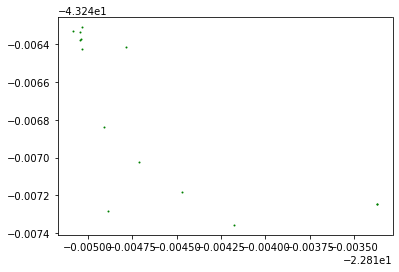

In [28]:
import matplotlib.pyplot as plt

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=1)
plt.show()

In [29]:
df1 = count_mac[count_mac[0].between(55,56)]
df1

,0
ClientMacAddr,
14:58:d0:72:e7:91,56
5c:c9:d3:88:c9:db,56
0c:cb:85:bb:52:f3,56
d8:9c:67:fe:64:cb,56
7c:8b:b5:2e:f3:43,56
...,...
e4:2b:34:23:65:50,55
80:58:f8:a4:e2:05,55
44:91:60:85:62:59,55


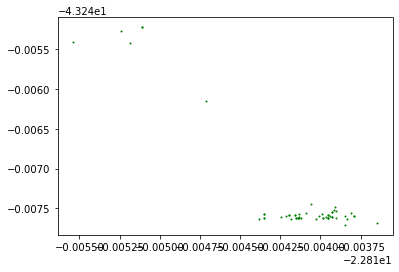

In [30]:
macid = '44:91:60:85:62:59'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

In [31]:
df1 = count_mac[count_mac[0].between(99,100)]
df1

,0
ClientMacAddr,
a4:b8:05:c5:46:73,100
48:49:c7:df:23:84,100
fc:64:3a:74:57:d8,100
44:91:60:64:d8:9d,100
60:1d:91:04:d6:f7,100
44:91:60:ce:d7:45,100
88:79:7e:6b:83:3b,100
0c:cb:85:93:8b:cf,100
04:d4:c4:9c:41:7d,100


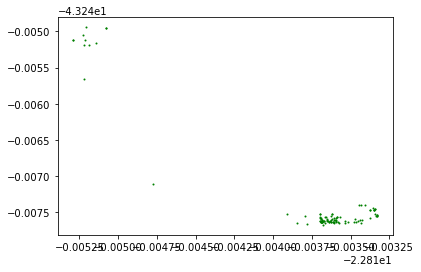

In [32]:
macid = 'd4:63:c6:a5:ec:3b'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

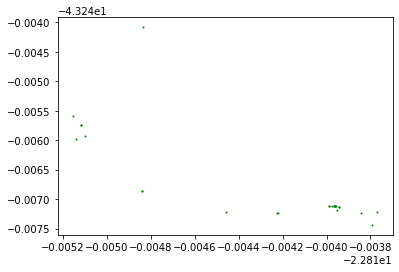

In [33]:
macid = 'ac:0d:1b:c9:60:ab'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

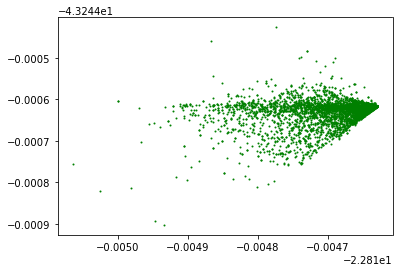

In [34]:
macid = '38:01:95:37:74:e0'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

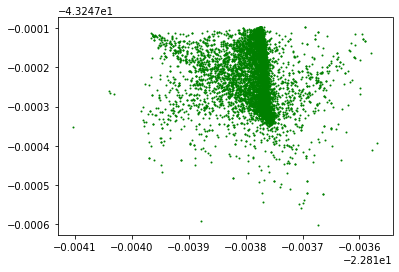

In [35]:
macid = '38:01:95:38:cf:bc'
x = [df[df['ClientMacAddr'] == macid]['lat']]
y=[df[df['ClientMacAddr'] == macid]['lng']]

plt.plot(x, y, color='green', marker='o', linestyle='dashed', linewidth=2, markersize=1)
plt.show()

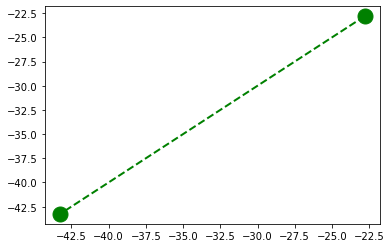

In [36]:
plt.plot((df['lat'].min(),df['lng'].min()),(df['lat'].min(), df['lng'].min()), color='green', marker='o', linestyle='dashed', linewidth=2, markersize=15)
plt.show()

https://www.datacamp.com/community/tutorials/geospatial-data-python
---------------------------

https://science.sciencemag.org/content/327/5968/1018/tab-article-info
Article Information
vol. 327 no. 5968 1018-1021

DOI: 
https://doi.org/10.1126/science.1177170
PubMed: 
20167789
Published By: 
American Association for the Advancement of Science
Print ISSN: 
0036-8075
Online ISSN: 
1095-9203
History: 
Received for publication June 2, 2009
Accepted for publication December 28, 2009
.
Copyright & Usage: 
Copyright © 2010, American Association for the Advancement of Science


https://github.com/pysal/notebooksv

## https://gis.stackexchange.com/questions/5857/clustering-trajectories-gps-data-of-x-y-points-and-mining-the-data
Please cite the following papers when using this GPS dataset. [1] Yu Zheng, Lizhu Zhang, Xing Xie, Wei-Ying Ma. Mining interesting locations and travel sequences from GPS trajectories. In Proceedings of International conference on World Wild Web (WWW 2009), Madrid Spain. ACM Press: 791-800. [2] Yu Zheng, Quannan Li, Yukun Chen, Xing Xie, Wei-Ying Ma. Understanding Mobility Based on GPS Data. In Proceedings of ACM conference on Ubiquitous Computing (UbiComp 2008), Seoul, Korea. ACM Press: 312-321. [3] Yu Zheng, Xing Xie, Wei-Ying Ma, GeoLife: A Collaborative Social Networking Service among User, location and trajectory. Invited paper, in IEEE Data Engineering Bulletin. 33, 2, 2010, pp. 32-40.

# Most useful in terms of our project and for the documentation
https://www.researchgate.net/publication/334030853_MovingPandas_Efficient_Structures_for_Movement_Data_in_Python

https://github.com/gboeing/urban-data-science/blob/master/15-Spatial-Cluster-Analysis/cluster-analysis.ipynb

In [37]:
len(df)

1034663

In [38]:
Filtered_df1 = df.copy()

In [39]:
(df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].max() - df[df['ClientMacAddr'] == 'a8:96:75:1b:b4:59']['lat'].min(),df[df['ClientMacAddr'] == '38:01:95:38:cf:bc']['lng'].max() - df[df['ClientMacAddr'] == '38:01:95:38:cf:bc']['lng'].min())

(0.0018894096384336478, 0.0005054223289420179)

In [40]:
from datetime import timedelta
df['localtime'].mean()+ timedelta(hours=3)

Timestamp('2019-11-19 14:50:11.544704512+0000', tz='UTC')

In [41]:
len(df)

1034663

In [42]:
count_lat = pd.DataFrame(df.groupby(['lat']).size()).sort_values(by=[0], ascending=False)
len(count_lat)

883056

In [43]:
count_lng = pd.DataFrame(df.groupby(['lng']).size()).sort_values(by=[0], ascending=False)
len(count_lng)

883056

In [44]:
count_lat.iloc[1]

0    15
Name: -22.814785462143455, dtype: int64

In [45]:
count_lng.iloc[1]

0    15
Name: -43.244201638326054, dtype: int64

In [46]:
df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
max_lat_lng = df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
pd.DataFrame(max_lat_lng.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

,0
ClientMacAddr,
04:79:70:60:f1:31,3
84:10:0d:b5:06:e0,2
c0:8c:71:31:bd:d3,2
fc:64:3a:d5:87:d0,2
24:46:c8:dc:b7:9c,1
88:40:3b:50:07:8b,1
f4:f5:24:c5:72:c6,1
f4:f5:24:8a:58:f7,1
f0:d7:aa:d8:75:10,1


In [47]:
df.loc[(df['lng'] == -43.247112045319234)]

,Building,Level,ClientMacAddr,lat,lng,localtime
1031595,TPS2,Level 3,18:31:bf:10:64:41,-22.813966,-43.247112,2019-11-19 23:55:42.429000+00:00
1005562,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.813966,-43.247112,2019-11-19 23:20:48.181000+00:00
1005423,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.813966,-43.247112,2019-11-19 23:20:38.246000+00:00
994587,TPS2,Level 3,f4:f5:24:c5:72:c6,-22.813966,-43.247112,2019-11-19 23:06:24.555000+00:00
982895,TPS2,Level 3,bc:98:df:da:85:86,-22.813966,-43.247112,2019-11-19 22:51:24.130000+00:00
971594,TPS2,Level 3,88:40:3b:50:07:8b,-22.813966,-43.247112,2019-11-19 22:37:38.495000+00:00
883335,TPS2,Level 3,68:a3:c4:80:ea:34,-22.813966,-43.247112,2019-11-19 19:44:38.850000+00:00
870920,TPS2,Level 3,98:39:8e:21:d8:5f,-22.813966,-43.247112,2019-11-19 19:19:45.587000+00:00
811677,TPS2,Level 3,48:49:c7:96:c9:24,-22.813966,-43.247112,2019-11-19 17:48:24.793000+00:00
769196,TPS2,Level 3,d0:77:14:18:c9:ac,-22.813966,-43.247112,2019-11-19 16:38:34.720000+00:00


In [48]:
df.loc[(df['lat'] == -22.814785462143455)&(df['lng'] == -43.244201638326054) ]
max_lat_lng = df.loc[(df['lat'] == -22.813965766508655)&(df['lng'] == -43.247112045319234) ]
pd.DataFrame(max_lat_lng.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

,0
ClientMacAddr,
04:79:70:60:f1:31,3
84:10:0d:b5:06:e0,2
c0:8c:71:31:bd:d3,2
fc:64:3a:d5:87:d0,2
24:46:c8:dc:b7:9c,1
88:40:3b:50:07:8b,1
f4:f5:24:c5:72:c6,1
f4:f5:24:8a:58:f7,1
f0:d7:aa:d8:75:10,1


In [49]:
"04:79:70:60:f1:31" == "04:79:70:60:f1:31" # occurred 3 times at (x1,y1),(x2,y2)

True

In [50]:
import math
x1=-22.814785462143455
x2=-43.244201638326054
y1= -22.813965766508655
y2= -43.247112045319234
#math.sqrt((x2 - x1)**2 + (y2 - y1)**2)


In [51]:
"84:10:0d:b5:06:e0" == "84:10:0d:b5:06:e0"  # occurred 2 times at (x1,y1),(x2,y2)

True

In [52]:
"c0:8c:71:31:bd:d3" == "c0:8c:71:31:bd:d3" # occurred 2 times at (x1,y1),(x2,y2)

True

In [53]:
"fc:64:3a:d5:87:d0" == "fc:64:3a:d5:87:d0"# occurred 2 times at (x1,y1),(x2,y2)

True

In [54]:
temp_df = df.loc[(df['ClientMacAddr'] == "84:10:0d:b5:06:e0")|(df['ClientMacAddr'] == "c0:8c:71:31:bd:d3")|(df['ClientMacAddr'] == "fc:64:3a:d5:87:d0") ]

pd.DataFrame(temp_df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

,0
ClientMacAddr,
c0:8c:71:31:bd:d3,259
fc:64:3a:d5:87:d0,219
84:10:0d:b5:06:e0,10


In [55]:
pd.DataFrame(temp_df.sort_values(by=['localtime'], ascending=False))

,Building,Level,ClientMacAddr,lat,lng,localtime
1034529,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246260,2019-11-19 23:59:48.135000+00:00
1034528,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246260,2019-11-19 23:59:48.134000+00:00
1034393,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815463,-43.246239,2019-11-19 23:59:38.212000+00:00
1034266,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815469,-43.246279,2019-11-19 23:59:28.118000+00:00
1034163,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246286,2019-11-19 23:59:18.115000+00:00
...,...,...,...,...,...,...
166896,TPS2,Level 3,c0:8c:71:31:bd:d3,-22.815094,-43.245565,2019-11-19 04:45:03.315000+00:00
166652,TPS2,Level 3,c0:8c:71:31:bd:d3,-22.815061,-43.245398,2019-11-19 04:44:43.282000+00:00
166559,TPS2,Level 3,c0:8c:71:31:bd:d3,-22.815007,-43.245210,2019-11-19 04:44:33.259000+00:00
166558,TPS2,Level 3,c0:8c:71:31:bd:d3,-22.815007,-43.245210,2019-11-19 04:44:33.258000+00:00


In [56]:
df[df['ClientMacAddr'] == '84:10:0d:b5:06:e0']['localtime'].max() - df[df['ClientMacAddr'] == '84:10:0d:b5:06:e0']['localtime'].min()

Timedelta('0 days 00:04:27')

In [57]:
df[df['ClientMacAddr'] == 'c0:8c:71:31:bd:d3']['localtime'].max() - df[df['ClientMacAddr'] == 'c0:8c:71:31:bd:d3']['localtime'].min()

Timedelta('0 days 02:39:35.171000')

In [58]:

df[df['ClientMacAddr'] == 'fc:64:3a:d5:87:d0']['localtime'].max() - df[df['ClientMacAddr'] == 'fc:64:3a:d5:87:d0']['localtime'].min()

Timedelta('0 days 01:23:26.353000')

In [59]:
temp1_df = df.loc[(df['ClientMacAddr'] == "84:10:0d:b5:06:e0")|(df['ClientMacAddr'] == "fc:64:3a:d5:87:d0") ]

pd.DataFrame(temp1_df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False)

,0
ClientMacAddr,
fc:64:3a:d5:87:d0,219
84:10:0d:b5:06:e0,10


In [60]:
pd.DataFrame(temp1_df.sort_values(by=['localtime'], ascending=False))

,Building,Level,ClientMacAddr,lat,lng,localtime
1034529,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246260,2019-11-19 23:59:48.135000+00:00
1034528,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246260,2019-11-19 23:59:48.134000+00:00
1034393,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815463,-43.246239,2019-11-19 23:59:38.212000+00:00
1034266,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815469,-43.246279,2019-11-19 23:59:28.118000+00:00
1034163,TPS2,Level 3,fc:64:3a:d5:87:d0,-22.815457,-43.246286,2019-11-19 23:59:18.115000+00:00
...,...,...,...,...,...,...
261523,TPS2,Level 3,84:10:0d:b5:06:e0,-22.813966,-43.247112,2019-11-19 06:51:59.351000+00:00
261522,TPS2,Level 3,84:10:0d:b5:06:e0,-22.813966,-43.247112,2019-11-19 06:51:59.350000+00:00
261388,TPS2,Level 3,84:10:0d:b5:06:e0,-22.813966,-43.247112,2019-11-19 06:51:49.590000+00:00
259885,TPS2,Level 3,84:10:0d:b5:06:e0,-22.814521,-43.247484,2019-11-19 06:49:54.337000+00:00


In [61]:
df['localtime'].mean()+ timedelta(hours=8)

Timestamp('2019-11-19 19:50:11.544704512+0000', tz='UTC')

df[df.groupby(['ClientMacAddr'])]

In [62]:
df

,Building,Level,ClientMacAddr,lat,lng,localtime
1034662,TPS2,Level 3,d4:63:c6:4e:72:5b,-22.814747,-43.244235,2019-11-19 23:59:59.414000+00:00
1034661,TPS2,Level 3,c0:a5:dd:17:fb:e6,-22.814484,-43.246923,2019-11-19 23:59:59.394000+00:00
1034660,TPS2,Level 3,40:9b:cd:96:44:5f,-22.813843,-43.247260,2019-11-19 23:59:59.255000+00:00
1034659,TPS2,Level 3,40:9b:cd:96:44:5f,-22.813843,-43.247260,2019-11-19 23:59:59.254000+00:00
1034658,TPS2,Level 3,b0:be:76:2f:41:47,-22.813922,-43.247604,2019-11-19 23:59:59.246000+00:00
...,...,...,...,...,...,...
4,TPS2,Level 3,40:9b:cd:96:44:14,-22.813448,-43.247592,2019-11-19 00:00:00.287000+00:00
3,TPS2,Level 3,8c:f1:12:2f:3e:d8,-22.813708,-43.247711,2019-11-19 00:00:00.274000+00:00
2,TPS2,Level 3,28:83:35:26:bc:f3,-22.813551,-43.247198,2019-11-19 00:00:00.272000+00:00
1,TPS2,Level 3,b8:27:eb:14:a4:88,-22.813697,-43.247597,2019-11-19 00:00:00.197000+00:00


In [63]:
df1

,0
ClientMacAddr,
a4:b8:05:c5:46:73,100
48:49:c7:df:23:84,100
fc:64:3a:74:57:d8,100
44:91:60:64:d8:9d,100
60:1d:91:04:d6:f7,100
44:91:60:ce:d7:45,100
88:79:7e:6b:83:3b,100
0c:cb:85:93:8b:cf,100
04:d4:c4:9c:41:7d,100


In [64]:
df_count = pd.DataFrame(df.groupby(['ClientMacAddr']).size()).sort_values(by=[0], ascending=False) 

In [65]:
df_count = df.copy()

In [111]:
df_solo = df_count.groupby("ClientMacAddr").filter(lambda x: len(x) > 10 and len(x) < 15)

In [112]:
len(df_solo.ClientMacAddr.unique())

1379

In [86]:
with open('tps2000000000181_161718.json', 'r') as datafile:
        data = json.load(datafile)
df_161718 = pd.DataFrame(data)

In [92]:
Mac_161718 = pd.DataFrame(df_161718['ClientMacAddr'],index=None)

In [118]:
solo_mac =set(df_solo.ClientMacAddr.unique()).difference(set(Mac_161718.ClientMacAddr.unique()))

In [119]:
#df_solo[df_solo['ClientMacAddr'] not in Mac_161718['ClientMacAddr'] ]

In [120]:
len(solo_mac)

1261

In [123]:
solo_macid_data = df_solo[df_solo['ClientMacAddr'].isin(solo_mac) ]

In [124]:
solo_macid_data

,Building,Level,ClientMacAddr,lat,lng,localtime
1034653,TPS2,Level 3,88:bf:e4:72:ff:4e,-22.814138,-43.247565,2019-11-19 23:59:58.368000+00:00
1034556,TPS2,Level 3,bc:ff:eb:23:7b:cc,-22.815094,-43.245538,2019-11-19 23:59:49.412000+00:00
1034418,TPS2,Level 3,bc:ff:eb:23:7b:cc,-22.815092,-43.245503,2019-11-19 23:59:39.421000+00:00
1034383,TPS2,Level 3,38:9a:f6:cc:24:11,-22.813887,-43.247158,2019-11-19 23:59:37.260000+00:00
1034346,TPS2,Level 3,d8:9c:67:fe:aa:a1,-22.813556,-43.247224,2019-11-19 23:59:33.203000+00:00
...,...,...,...,...,...,...
296,TPS2,Level 3,d4:c9:4b:b7:b4:ac,-22.813926,-43.247654,2019-11-19 00:00:21.262000+00:00
288,TPS2,Level 3,cc:9e:a2:fb:86:fb,-22.814923,-43.247013,2019-11-19 00:00:21.148000+00:00
261,TPS2,Level 3,50:92:b9:88:8d:00,-22.813395,-43.247474,2019-11-19 00:00:19.099000+00:00
219,TPS2,Level 3,fc:64:3a:db:5e:80,-22.814881,-43.246508,2019-11-19 00:00:14.378000+00:00


In [127]:
solo_macid_data.to_json('Solo.json',orient='records')

# 2. Group Traveler Data

In [ ]:
import json
import sys
import pyspark
from operator import add
from pyspark import SparkContext
import pandas as pd

lines = sc.textFile("gs://testdatakiana/tps2*",6)
rdd=lines.map(lambda x:json.loads(x))
df_16= rdd.filter(lambda x: "2019-11-16"  in x['localtime'])
df_17= rdd.filter(lambda x: "2019-11-17"  in x['localtime'])
df_18= rdd.filter(lambda x: "2019-11-18"  in x['localtime'])
df_19= rdd.filter(lambda x: "2019-11-19"  in x['localtime'])
df_20= rdd.filter(lambda x: "2019-11-20"  in x['localtime'])
df_16_mac = df_19.map(lambda x: (x["ClientMacAddr"])).distinct()
df_17_mac = df_17.map(lambda x: (x["ClientMacAddr"])).distinct()
df_18_mac = df_18.map(lambda x: (x["ClientMacAddr"])).distinct()
df_19_mac = df_19.map(lambda x: (x["ClientMacAddr"])).distinct()
df_20_mac = df_20.map(lambda x: (x["ClientMacAddr"])).distinct()
intersection_mac = (((df_16_mac.intersection(df_17_mac)).intersection(df_18_mac)).intersection(df_19_mac)).intersection(df_20_mac)
mac_id_group = intersection_mac.collect()
group = df_19.filter(lambda x: x['ClientMacAddr'] in mac_id_group).map(lambda x:(x['Building'],x['ClientMacAddr'],x['Level'],x['lat'],x['lng'],x['localtime'],0))